In [9]:
import pandas as pd
import numpy as np
import math
import sklearn.tree
import sklearn.datasets
from sklearn.tree import plot_tree

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
import ml_utils
plt.rcParams["figure.figsize"] = (8,8)

## 3950 Assignment 1: Part 2

For this assignment we want to use some sort of tree based model to classify the data below. We have a very small training set, so overfitting is a very real concern. 

Some specifics for this assignment:
<ul>
<li>Please use the show_eda to control if EDA stuff is shown. I don't really need to see all the EDA stuff (nor do you after you've done it), so we can make it configurable with a variable to speed up time. Please set this FALSE when you submit, so I can run all and see the outcome without histograms etc...
<li>Please ensure that whatever model you end up with is in a variable named best at the end.
<li>Please use some pipeline in prepping the data. The test data is in an identical format to the training data, so whatever pipeline you've created for your training will work for the testing. 
<li>The accuracy scoring will be an average of accuracy and roc_auc. 
</ul>

### Grading Metrics
<ul>
<li><b>Pipeline Used - 10pts</b> The data loading needs to be in a pipeline. See the test part for illustration. When testing I'll call your pipe with the new data (format is identical to training), so any prep stuff should be in the pipeline. 
<li><b>Tree Based Model Used - 5pts</b> The model used for classification needs to be some variety of tree, beyond that it is up to you. 
<li><b>Accuracy - 5pts</b> The final accuracy acheived. This will be a rough ranking, I'm assuming most people will get a similar level of accuracy, marks will only be deducted if yours is far wosrse, as that's an indication that you probably didn't take any/many steps to improve things. 
<li><b>Clarity and Formatting - 5pts</b> Is it organized and can I read it?
    <ul>
    <li> <b>Note:</b> for this assignment, and in general, please get rid of my comments and replace them with your own. I'm going to read this, so all of these instructions aren't really required. Think of this as a template, get rid of the stuff that isn't needed, and leave only the things you need to explain your code. 
    </ul>
</ul>

For submission, please drop the URL for your repository in the dropbox.

In [10]:
#Please change to your name.
name = "Fei-Ju Hsiao"

#Please use this to control EDA. 
show_eda = False

In [12]:
#Load data
df = pd.read_csv("training.csv")
df = df.drop(columns={"id"})
df.sample(5)

,target,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,var_200
63,1,0.015,0.077,0.912,0.282,0.730,0.148,0.299,0.564,0.802,...,0.985,0.431,0.930,0.359,0.982,0.319,0.882,0.906,0.382,0.251
4,0,0.846,0.431,0.805,0.237,0.465,0.642,0.219,0.102,0.795,...,0.704,0.242,0.089,0.605,0.577,0.043,0.686,0.070,0.666,0.572
53,0,0.089,0.392,0.351,0.807,0.627,0.040,0.869,0.119,0.343,...,0.774,0.484,0.508,0.412,0.458,0.981,0.616,0.539,0.977,0.979
58,1,0.653,0.172,0.091,0.845,0.238,0.532,0.920,0.891,0.760,...,0.558,0.728,0.494,0.802,0.744,0.257,0.889,0.920,0.735,0.502
119,0,0.679,0.345,0.321,0.411,0.279,0.700,0.046,0.117,0.762,...,0.666,0.306,0.552,0.754,0.013,0.581,0.030,0.662,0.516,0.641


### Starting

For this assignment, you have a small training set, so combatting overfitting is key in being accurate!

In [11]:
df.shape

(250, 201)

In [13]:
df_eda = ml_utils.edaDF(df,"target")
if show_eda == True:
    df_eda.fullEDA()

#### Do Modelling Stuff

Make a tree model (of some vareity) and make it fit well. Keep in mind the possibility of your tree overfitting, and think of steps you may need to combat that shoudl it occur. 

In [14]:
for i in df.columns:
    df[i] = df[i].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Columns: 201 entries, target to var_200
dtypes: category(201)
memory usage: 2.0 MB


In [7]:
df.describe().T

,count,unique,top,freq
target,250.0,2.0,1.000,131.0
var_1,250.0,223.0,0.850,3.0
var_2,250.0,225.0,0.813,4.0
var_3,250.0,218.0,0.677,3.0
var_4,250.0,222.0,0.983,3.0
...,...,...,...,...
var_196,250.0,224.0,0.436,3.0
var_197,250.0,224.0,0.118,4.0
var_198,250.0,219.0,0.778,3.0
var_199,250.0,217.0,0.539,3.0


8
Training Accuracy: 1.0
Testing Accuracy: 0.4126984126984127


[Text(0.24375, 0.9444444444444444, 'var_177 <= 0.139\ngini = 0.499\nsamples = 187\nvalue = [90, 97]\nclass = True'),
 Text(0.08571428571428572, 0.8333333333333334, 'var_12 <= 0.897\ngini = 0.213\nsamples = 33\nvalue = [4, 29]\nclass = True'),
 Text(0.05714285714285714, 0.7222222222222222, 'var_129 <= 0.038\ngini = 0.064\nsamples = 30\nvalue = [1, 29]\nclass = True'),
 Text(0.02857142857142857, 0.6111111111111112, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = False'),
 Text(0.08571428571428572, 0.6111111111111112, 'gini = 0.0\nsamples = 29\nvalue = [0, 29]\nclass = True'),
 Text(0.11428571428571428, 0.7222222222222222, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = False'),
 Text(0.4017857142857143, 0.8333333333333334, 'var_116 <= 0.164\ngini = 0.493\nsamples = 154\nvalue = [86, 68]\nclass = False'),
 Text(0.17142857142857143, 0.7222222222222222, 'var_28 <= 0.207\ngini = 0.33\nsamples = 24\nvalue = [5, 19]\nclass = True'),
 Text(0.14285714285714285, 0.6111111111111112, 'gini = 0.

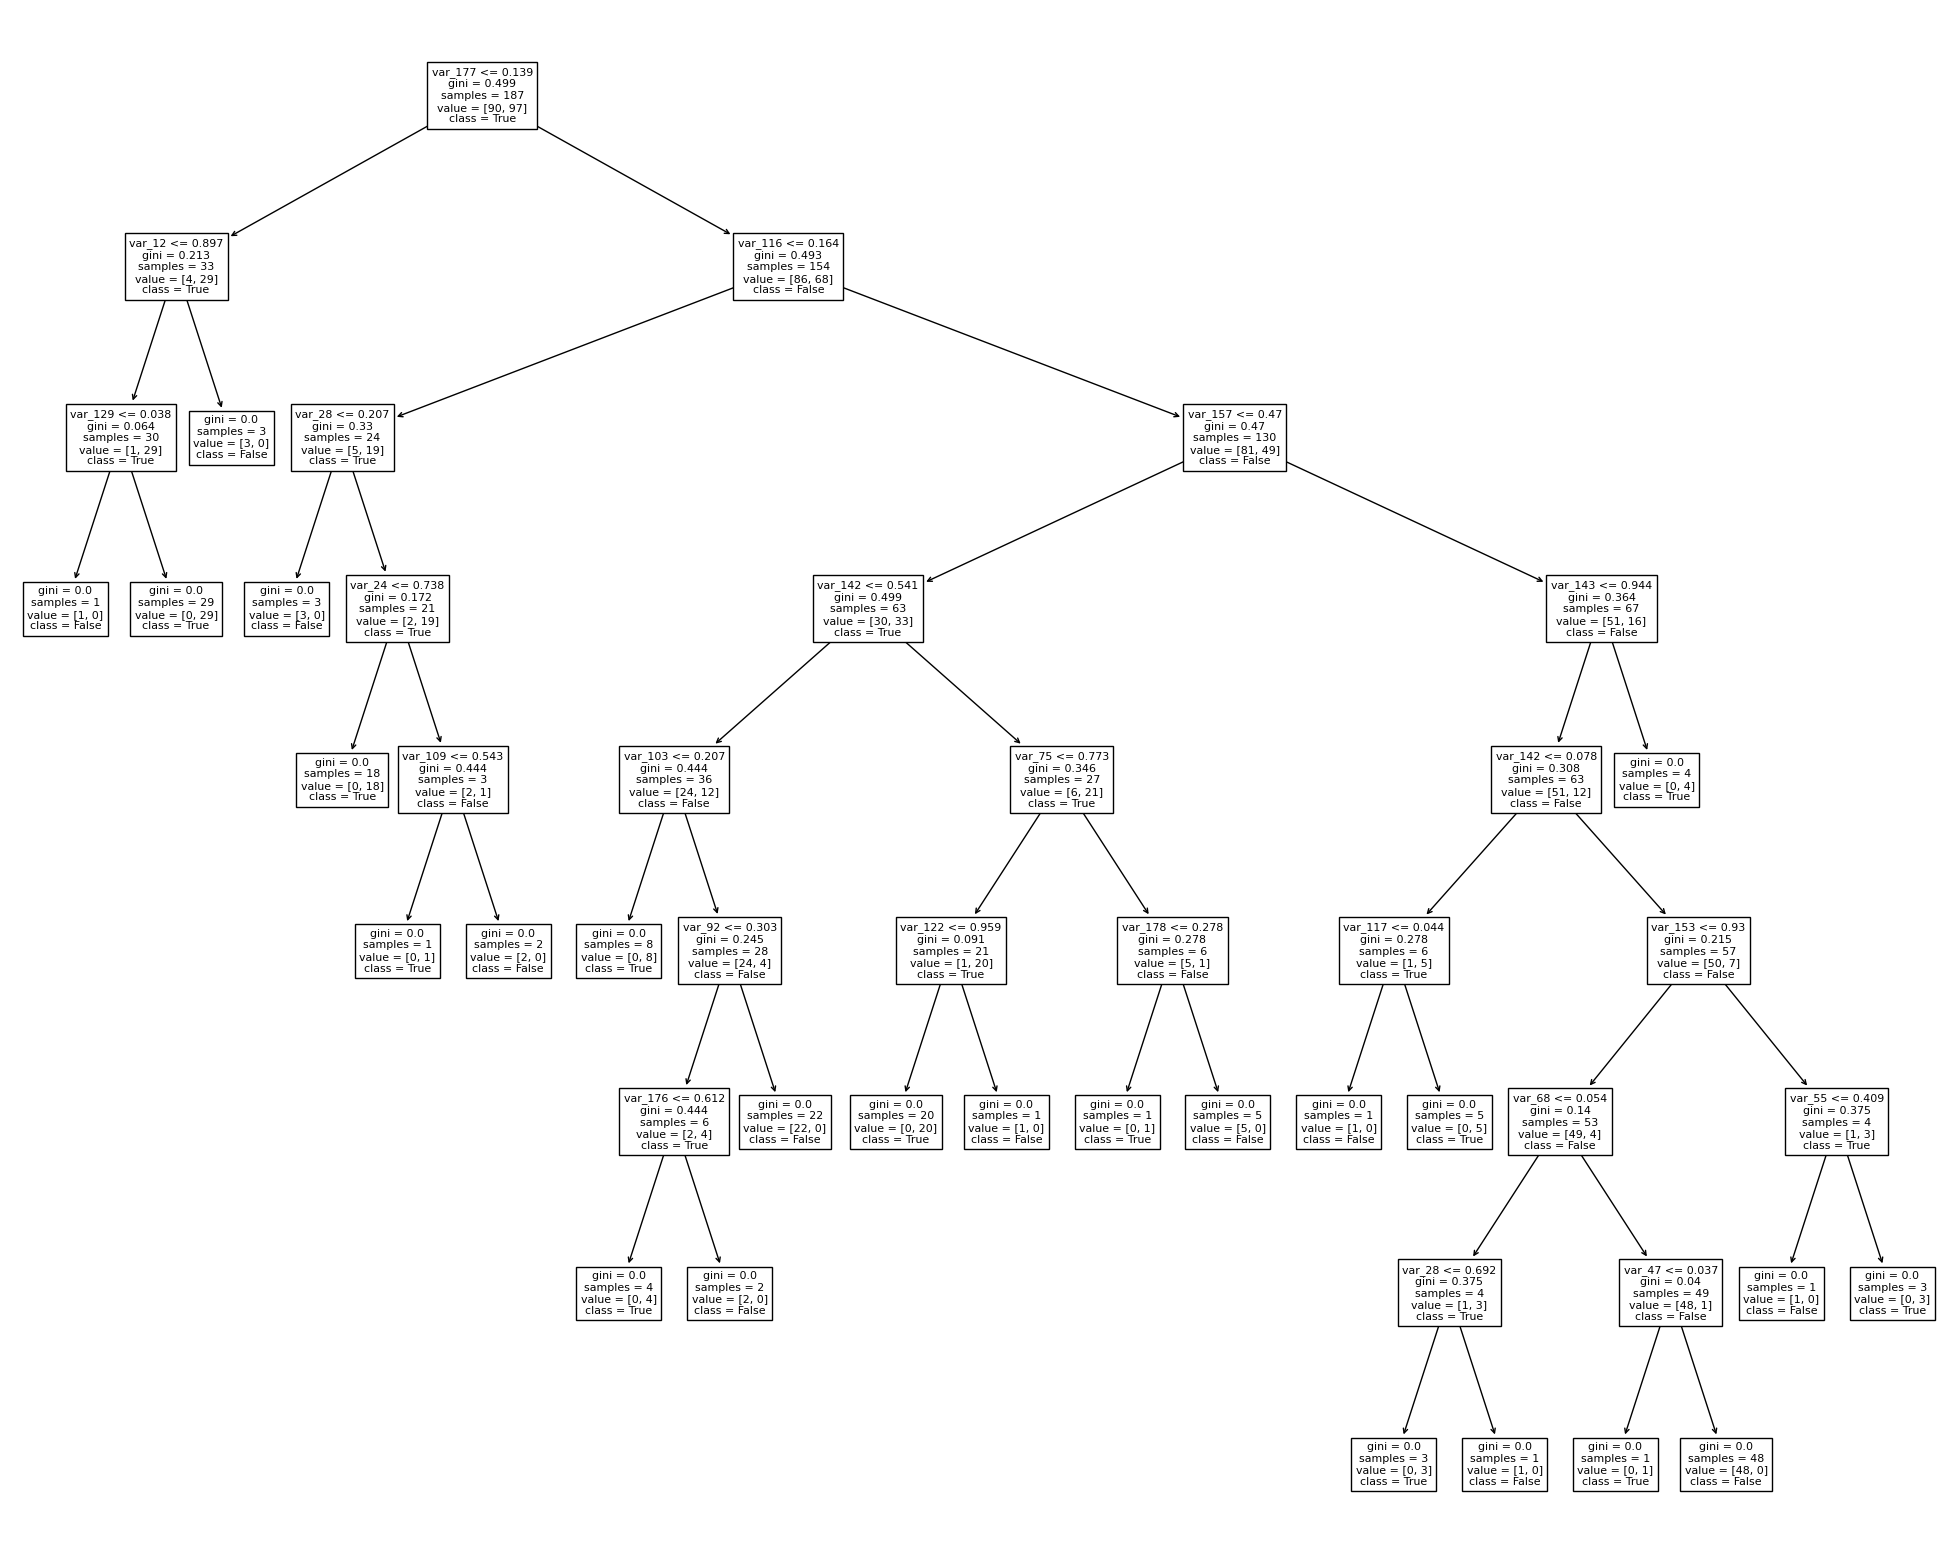

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

y = df['target']
x = df.drop(columns = {'target'})

x_train, x_test, y_train, y_test = train_test_split(x, y)

clf = DecisionTreeClassifier(random_state = 0)
clf = clf.fit(x_train, y_train)
print(clf.get_depth())
print("Training Accuracy:", clf.score(x_train, y_train))
print("Testing Accuracy:", clf.score(x_test, y_test))
plt.figure(figsize=(25,20))
plot_tree(clf, feature_names=df.columns[:-1], class_names=["False","True"])

12
Training Accuracy: 1.0
Testing Accuracy: 0.5079365079365079


[Text(0.5897435897435898, 0.9615384615384616, 'var_177 <= 0.12\nentropy = 0.999\nsamples = 187\nvalue = [90, 97]\nclass = True'),
 Text(0.38461538461538464, 0.8846153846153846, 'var_87 <= 0.866\nentropy = 0.469\nsamples = 30\nvalue = [3, 27]\nclass = True'),
 Text(0.3333333333333333, 0.8076923076923077, 'entropy = 0.0\nsamples = 25\nvalue = [0, 25]\nclass = True'),
 Text(0.4358974358974359, 0.8076923076923077, 'var_131 <= 0.457\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]\nclass = False'),
 Text(0.38461538461538464, 0.7307692307692307, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = True'),
 Text(0.48717948717948717, 0.7307692307692307, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = False'),
 Text(0.7948717948717948, 0.8846153846153846, 'var_49 <= 0.931\nentropy = 0.992\nsamples = 157\nvalue = [87, 70]\nclass = False'),
 Text(0.7435897435897436, 0.8076923076923077, 'var_147 <= 0.817\nentropy = 0.999\nsamples = 146\nvalue = [76, 70]\nclass = False'),
 Text(0.5897435897435898

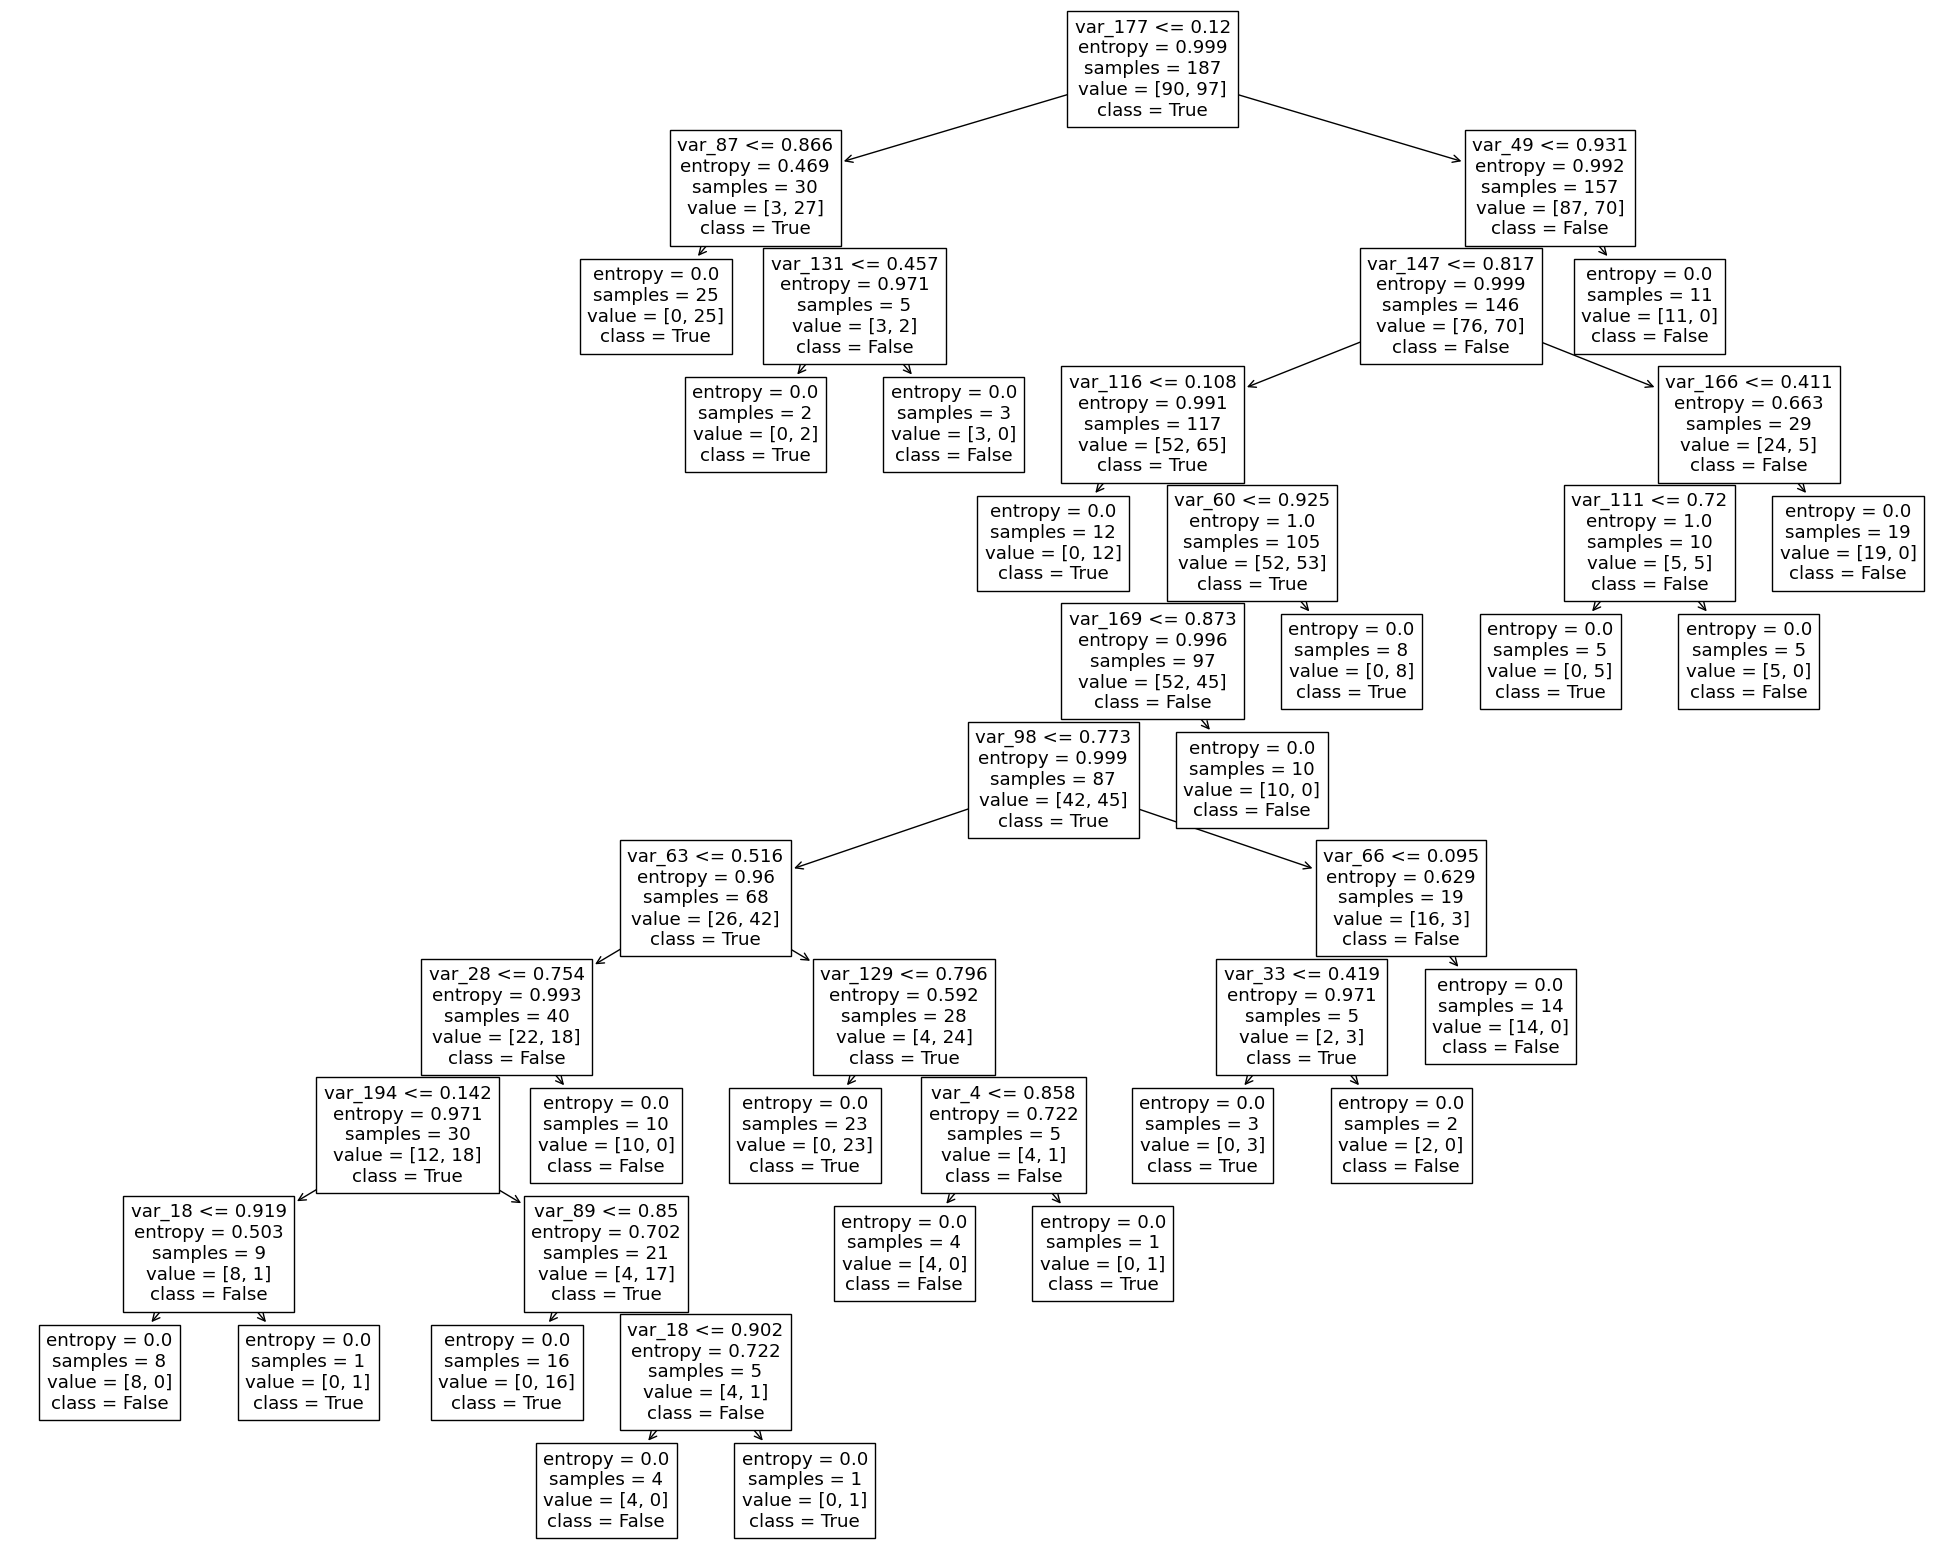

In [16]:
#Tree with entropy
clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(x_train, y_train)

print(clf.get_depth())
print("Training Accuracy:", clf.score(x_train, y_train))
print("Testing Accuracy:", clf.score(x_test, y_test))
plt.figure(figsize=(25,20))
plot_tree(clf, feature_names=df.columns[:-1], class_names=["False","True"])

7
Training Accuracy: 0.9893048128342246
Testing Accuracy: 0.4444444444444444


[Text(0.25, 0.9375, 'var_177 <= 0.139\ngini = 0.499\nsamples = 187\nvalue = [90, 97]\nclass = True'),
 Text(0.1, 0.8125, 'var_12 <= 0.897\ngini = 0.213\nsamples = 33\nvalue = [4, 29]\nclass = True'),
 Text(0.06666666666666667, 0.6875, 'var_147 <= 0.922\ngini = 0.064\nsamples = 30\nvalue = [1, 29]\nclass = True'),
 Text(0.03333333333333333, 0.5625, 'gini = 0.0\nsamples = 29\nvalue = [0, 29]\nclass = True'),
 Text(0.1, 0.5625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = False'),
 Text(0.13333333333333333, 0.6875, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = False'),
 Text(0.4, 0.8125, 'var_116 <= 0.164\ngini = 0.493\nsamples = 154\nvalue = [86, 68]\nclass = False'),
 Text(0.2, 0.6875, 'var_147 <= 0.839\ngini = 0.33\nsamples = 24\nvalue = [5, 19]\nclass = True'),
 Text(0.16666666666666666, 0.5625, 'var_170 <= 0.853\ngini = 0.172\nsamples = 21\nvalue = [2, 19]\nclass = True'),
 Text(0.13333333333333333, 0.4375, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]\nclass = True'),
 Text(0.

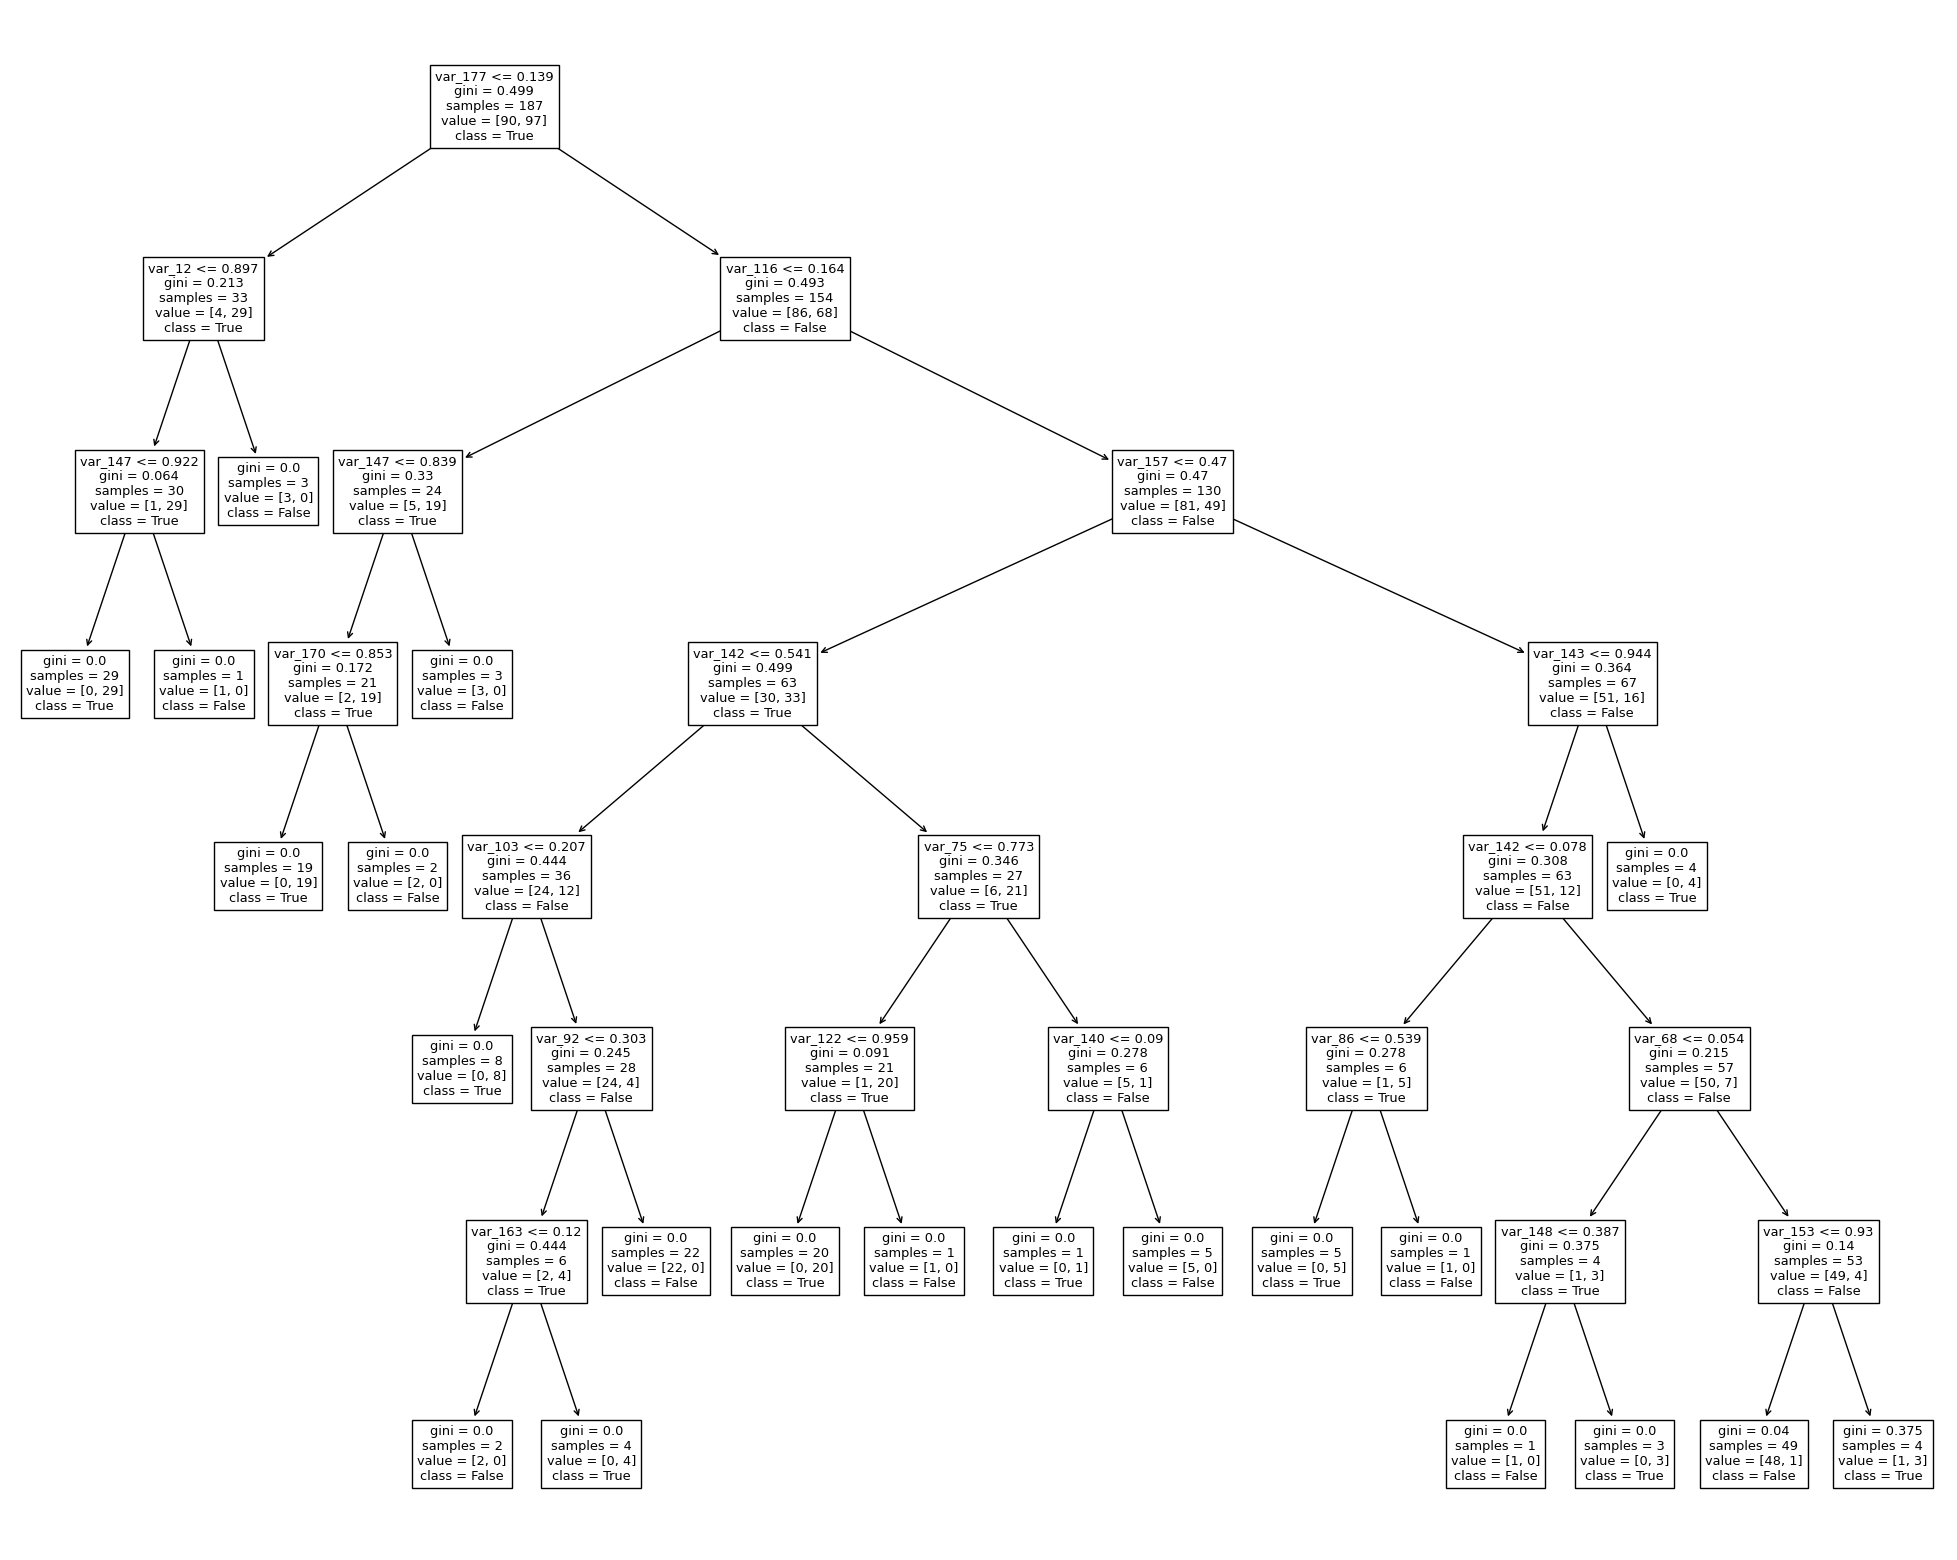

In [42]:
#limit depth
clf = DecisionTreeClassifier(max_depth=7)
clf = clf.fit(x_train, y_train)

print(clf.get_depth())
print("Training Accuracy:", clf.score(x_train, y_train))
print("Testing Accuracy:", clf.score(x_test, y_test))
plt.figure(figsize=(25,20))
plot_tree(clf, feature_names=df.columns[:-1], class_names=["False","True"])

### Finishing

At the conclusion, please name your best model "best". If you look down below in the testing stuff, it should be usable to score as "best". 

You should be able to call it like this and it should work (with whatever data names you have)

In [34]:
from sklearn.model_selection import GridSearchCV

#Create a dictionary of HP names and lists of potential values. 
#The grid search will try all of these options. 
tree_para = {'min_samples_split':[6,7,8,9,10,11],'max_depth':[7,8,9,10,11,12]}

clf = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=tree_para, cv=10) #See below for the CV argument
clf.fit(x_train, y_train)
clf.best_estimator_

DecisionTreeClassifier(max_depth=9, min_samples_split=8)

In [35]:
from sklearn.ensemble import RandomForestClassifier
#limit depth
clf = DecisionTreeClassifier(max_depth=9)
clf = clf.fit(x_train, y_train)

print("Training Accuracy:", clf.score(x_train, y_train))
print("Testing Accuracy:", clf.score(x_test, y_test))

Training Accuracy: 1.0
Testing Accuracy: 0.4444444444444444


In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#Create a dictionary of HP names and lists of potential values. 
#The grid search will try all of these options. 
tree_para = {'min_samples_split':[6,7,8,9,10,11],'max_depth':[7,8,9,10,11,12]}

clf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=tree_para, cv=10) #See below for the CV argument
clf.fit(x_train, y_train)
clf.best_estimator_

RandomForestClassifier(max_depth=8, min_samples_split=6)

In [37]:
from sklearn.ensemble import RandomForestClassifier
#limit depth
clf = RandomForestClassifier(max_depth=8)
clf = clf.fit(x_train, y_train)

print("Training Accuracy:", clf.score(x_train, y_train))
print("Testing Accuracy:", clf.score(x_test, y_test))

Training Accuracy: 1.0
Testing Accuracy: 0.6825396825396826


In [38]:
#Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

y1 = np.array(df["target"]).reshape(-1,1)
x1 = np.array(df.drop(columns={"target"}))
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1)

scaler1 = MinMaxScaler()
estimator1 = RandomForestClassifier(n_jobs=-1)
pipe1 = Pipeline(steps=[("scaler", scaler1), ("forrest", estimator1)])

params1 = {'forrest__max_depth':[5,6,7,8,9,10,11], "forrest__n_estimators":[75,100,125]}
 
clf1 = GridSearchCV(pipe1, param_grid=params1, cv=5, n_jobs=-1) 
clf1.fit(x1_train, y1_train.ravel())
best = clf1.best_estimator_

In [39]:
print(best.score(x_test, y_test))
print(best)

0.9206349206349206
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('forrest',
                 RandomForestClassifier(max_depth=11, n_estimators=125,
                                        n_jobs=-1))])


c:\Users\Elsa\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


### Testing

Please leave the stuff below as-is in your file. 

This will take your best model and score it with the test data. If you want to test to make sure that yours works, make a copy of the data file and rename it testing.csv, then make sure this runs ok. I will do the same, but the contents of my test file will be different. 

In [ ]:
#Load Test Data
test_df = pd.read_csv("testing.csv")
test_df = test_df.drop(columns={"id"})
#Create tests and score
test_y = np.array(test_df["target"]).reshape(-1,1)
test_X = np.array(test_df.drop(columns={"target"}))

preds = best.predict(test_X)

roc_score = roc_auc_score(test_y, preds)
acc_score = accuracy_score(test_y, preds)

print(roc_score)
print(acc_score)
print(name, np.mean([roc_score, acc_score]))


### What Accuracy Changes Were Used

Please list here what you did to try to increase accuracy and/or limit overfitting:

<ul> 
<li> used (Gini) DecisionTreeClassifier and set the random state = 0 to test the data, the depth was 8 layers, and the accuracy was only 0.413. 

<li> used (Entropy) DecisionTreeClassifier to test it. the depth was 12 layers, and the accuracy was slightly increased to 0.508. 

<li> the third time, I controlled the depth to 7. the accuracy went down to 0.444.

<li> If used Grid searched with the estimator DecisionTreeClassifier, the max depth was 9. 

For the RandomForestClassifier, the best depth was 8 and the accuracy was 68%. The best score with RandomForestClassifier was 0.921.
</ul>